# Code for EDA

In [43]:
#This part of the code appears both in "Introduction.py" as well as "Conclusion.py"

#Code for preliminary look at census and income dataset

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

url = 'https://raw.githubusercontent.com/AmbarCRoAl/Fundations-of-Data-Science/main/adult_data.csv'
df_census = pd.read_csv(url)
# fnlwgt is final weight, which is a weight of population percentage representation
# they used 3 sets of controls. These are: A single cell estimate of the population 16+
# for each state. Controls for Hispanic Origin by age and sex. Controls by Race, age
# and sex. The term estimate refers to population totals derived from Current Population Survey by creating
# "weighted tallies" of any specified socio-economic characteristics of the population.
# People with similar demographic characteristics should have similar weights.

print("Number of null values:\n", df_census.isnull().sum())
print('Description:\n', df_census.describe())
print('\n\nCorrelations:\n', df_census.corr())
print('\n\nActual Dataset:\n', df_census)

Number of null values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
mariatl           0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
countr            0
income            0
dtype: int64
Description:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max      

<ipython-input-43-e31cc71335bb>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('\n\nCorrelations:\n', df_census.corr())


In [44]:
#Cleaning data and summing different attributes
df1 = df_census.copy()
df1 = df1.dropna()

#Function for summing an attribute in a pre-defined array
def sum_groups(datarow, column_to_sum, sum_data):
  if datarow['age'] < 25 and datarow['sex']=='Female':
    sum_data[0]+= datarow[column_to_sum]
  if datarow['age'] >= 25 and datarow['sex']=='Female':
    if datarow['age'] < 45:
      sum_data[1]+= datarow[column_to_sum]
    elif datarow['age'] < 65:
      sum_data[2]+= datarow[column_to_sum]
    elif datarow['age'] >= 65:
      sum_data[3]+= datarow[column_to_sum]
  if datarow['age'] < 25 and datarow['sex']=='Male':
    sum_data[4]+= datarow[column_to_sum]
  if datarow['age'] >= 25 and datarow['sex']=='Male':
    if datarow['age'] < 45:
      sum_data[5]+= datarow[column_to_sum]
    elif datarow['age'] < 65:
      sum_data[6]+= datarow[column_to_sum]
    elif datarow['age'] >= 65:
      sum_data[7]+= datarow[column_to_sum]

  if datarow['mariatl'] == 'Divorced':
    sum_data[8]+= datarow[column_to_sum]
  if datarow['mariatl'] == 'Never-married':
    sum_data[9]+= datarow[column_to_sum]
  if datarow['mariatl'] == 'Married':
    sum_data[10]+= datarow[column_to_sum]
  if datarow['mariatl'] == 'Separated':
    sum_data[11]+= datarow[column_to_sum]
  if datarow['mariatl'] == 'Widowed':
    sum_data[12]+= datarow[column_to_sum]

  if datarow['education'] == 'HS-grad':
    sum_data[13]+= datarow[column_to_sum]
  if datarow['education'] == 'Some-college':
    sum_data[14]+= datarow[column_to_sum]
  if datarow['education'] == 'Bachelors':
    sum_data[15]+= datarow[column_to_sum]
  if datarow['education'] == 'Masters':
    sum_data[16]+= datarow[column_to_sum]
  if datarow['education'] == 'Doctorate':
    sum_data[17]+= datarow[column_to_sum]

  if datarow['workclass'] == 'State-gov':
    sum_data[18]+= datarow[column_to_sum]
  if datarow['workclass'] == 'Federal-gov':
    sum_data[19]+= datarow[column_to_sum]
  if datarow['workclass'] == 'Private':
    sum_data[20]+= datarow[column_to_sum]
  if datarow['workclass'] == 'Self-emp-not-inc':
    sum_data[21]+= datarow[column_to_sum]
  if datarow['workclass'] == 'Self-emp-inc':
    sum_data[22]+= datarow[column_to_sum]

  if datarow['countr'] == 'United_States':
    sum_data[23]+= datarow[column_to_sum]
  if datarow['countr'] == 'South_America':
    sum_data[24]+= datarow[column_to_sum]
  if datarow['countr'] == 'Canada':
    sum_data[25]+= datarow[column_to_sum]
  if datarow['countr'] == 'Europe':
    sum_data[26]+= datarow[column_to_sum]
  if datarow['countr'] == 'Asia':
    sum_data[27]+= datarow[column_to_sum]
  return

#Function to count the amount of incidence of each category
def count(datarow, sum_data):
  if datarow['age'] < 25 and datarow['sex']=='Female':
    sum_data[0]+= 1
  if datarow['age'] >= 25 and datarow['sex']=='Female':
    if datarow['age'] < 45:
      sum_data[1]+= 1
    elif datarow['age'] < 65:
      sum_data[2]+= 1
    elif datarow['age'] >= 65:
      sum_data[3]+= 1
  if datarow['age'] < 25 and datarow['sex']=='Male':
    sum_data[4]+= 1
  if datarow['age'] >= 25 and datarow['sex']=='Male':
    if datarow['age'] < 45:
      sum_data[5]+= 1
    elif datarow['age'] < 65:
      sum_data[6]+= 1
    elif datarow['age'] >= 65:
      sum_data[7]+= 1

  if datarow['mariatl'] == 'Divorced':
    sum_data[8]+= 1
  if datarow['mariatl'] == 'Never-married':
    sum_data[9]+= 1
  if datarow['mariatl'] == 'Married':
    sum_data[10]+= 1
  if datarow['mariatl'] == 'Separated':
    sum_data[11]+= 1
  if datarow['mariatl'] == 'Widowed':
    sum_data[12]+= 1

  if datarow['education'] == 'HS-grad':
    sum_data[13]+= 1
  if datarow['education'] == 'Some-college':
    sum_data[14]+= 1
  if datarow['education'] == 'Bachelors':
    sum_data[15]+= 1
  if datarow['education'] == 'Masters':
    sum_data[16]+= 1
  if datarow['education'] == 'Doctorate':
    sum_data[17]+= 1

  if datarow['workclass'] == 'State-gov':
    sum_data[18]+= 1
  if datarow['workclass'] == 'Federal-gov':
    sum_data[19]+= 1
  if datarow['workclass'] == 'Private':
    sum_data[20]+= 1
  if datarow['workclass'] == 'Self-emp-not-inc':
    sum_data[21]+= 1
  if datarow['workclass'] == 'Self-emp-inc':
    sum_data[22]+= 1

  if datarow['countr'] == 'United_States':
    sum_data[23]+= 1
  if datarow['countr'] == 'South_America':
    sum_data[24]+= 1
  if datarow['countr'] == 'Canada':
    sum_data[25]+= 1
  if datarow['countr'] == 'Europe':
    sum_data[26]+= 1
  if datarow['countr'] == 'Asia':
    sum_data[27]+= 1
  return

#Changing income to 0 if <=50K and 1 if >=50K
# Define a mapping dictionary to make data more manegable
# To get unique values in a column one should use: * unique_values = df1['mariatl'].unique() *
string_to_float_income = {'<=50K': 0, '>50K': 1}
country_to_regions = {'United-States': 'United_States', 'Cambodia': 'Asia',
                   'England': 'Europe', 'Puerto-Rico': 'United_States',
                   'Germany': 'Europe','Outlying-US(Guam-USVI-etc)': 'United_States',
                   'India': 'Asia', 'Japan': 'Asia', 'Greece': 'Europe', 'China': 'Asia',
                   'Cuba': 'South_America', 'Iran': 'Asia', 'Honduras': 'South_America',
                   'Philippines': 'Asia', 'Italy': 'Europe', 'Poland': 'Europe',
                   'Jamaica': 'South_America', 'Vietnam': 'Asia','Mexico': 'South_America',
                   'Portugal': 'Europe', 'Ireland': 'Europe', 'France': 'Europe',
                   'Dominican-Republic': 'South_America', 'Laos': 'Asia', 'Ecuador': 'South_America',
                   'Taiwan': 'Asia', 'Haiti': 'South_America', 'Columbia': 'South_America',
                   'Hungary': 'Europe', 'Guatemala': 'South_America', 'Nicaragua': 'South_America',
                   'Scotland': 'Europe', 'Thailand': 'Asia', 'Yugoslavia': 'Europe',
                   'El-Salvador': 'South_America', 'Trinadad&Tobago': 'South_America',
                   'Peru': 'South_America', 'Hong': 'Asia', 'Holand-Netherlands': 'Europe' }
marital_married = {'Married-civ-spouse':'Married', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'}

# Replace string values with corresponding values
df1['income'] = df1['income'].replace(string_to_float_income)
df1['countr'] = df1['countr'].replace(country_to_regions)
df1['mariatl'] = df1['mariatl'].replace(marital_married)
print('\n\nNew modified data frame:\n', df1.head(10))

#Sum of fnlwgt for different types of attributes
groups = ['f_under25', 'f_25to45', 'f_45to65', 'f_over65', 'm_under25',
          'm_25to45', 'm_45to65', 'm_over65', 'Divorced', 'Never-married', 'Married',
          'Separated', 'Widowed', 'HS-grad', 'Some-college', 'Bachelors', 'Masters',
          'Doctorate','State-gov', 'Federal-gov',  'Private', 'Self-emp-not-inc', 'Self-emp-inc',
          'United_States', 'South_America', 'Canada', 'Europe', 'Asia']
num = len(groups)    #Number of attributes being studied; it will be used through out the rest of the code
sum_of_people = np.zeros(num)   #how many people earns above 50k for each attribute
sum_of_gains_over = np.zeros(num)     #how much was gain for people in the groups that earned over 50k
sum_of_gains_under = np.zeros(num)    #how much was gain for people in the groups that earned under 50k
sum_of_loss_over = np.zeros(num)     #how much was loss for people in the groups that earned over 50k
sum_of_loss_under = np.zeros(num)    #how much was loss for people in the groups that earned under 50k

sum_all_people = np.zeros(num)   #all the fnlwgt for each category, regardless weather or not they earned over 50K
sum_all_counts = np.zeros(num)     #the number of counts for each category
sum_all_over = np.zeros(num)     #the count of people who earned over 50K for each category

for index, row in df1.iterrows():
  sum_groups(row, 'fnlwgt', sum_all_people)
  sum_groups(row, 'income', sum_all_over)
  count(row, sum_all_counts)
  if row['income']:
    #print('\n\nFinal weight:\n', row['fnlwgt'])
    # Sum the values in column B
    sum_groups(row, 'fnlwgt', sum_of_people)
    sum_groups(row, 'capital-loss', sum_of_loss_over)
    sum_groups(row, 'capital-gain', sum_of_gains_over)
  else:
    sum_groups(row, 'capital-loss', sum_of_loss_under)
    sum_groups(row, 'capital-gain', sum_of_gains_under)





New modified data frame:
    age         workclass  fnlwgt  education  education-num        mariatl  \
0   39         State-gov   77516  Bachelors             13  Never-married   
1   50  Self-emp-not-inc   83311  Bachelors             13        Married   
2   38           Private  215646    HS-grad              9       Divorced   
3   53           Private  234721       11th              7        Married   
4   28           Private  338409  Bachelors             13        Married   
5   37           Private  284582    Masters             14        Married   
6   49           Private  160187        9th              5        Married   
7   52  Self-emp-not-inc  209642    HS-grad              9        Married   
8   31           Private   45781    Masters             14  Never-married   
9   42           Private  159449  Bachelors             13        Married   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male      

In [45]:
#Making ratios

ratio_people = np.zeros(num)
ratio_gain_over = np.zeros(num)
ratio_gain_under = np.zeros(num)
ratio_loss_over = np.zeros(num)
ratio_loss_under = np.zeros(num)
ratio_counts = np.zeros(num)

for i in range(num):
  #print("\ngroup:", groups[i])
  #print('sum of people:', sum_of_people[i], 'and sum of all people:', sum_all_people[i])
  if sum_all_people[i] == 0:
    print('There was no person in the group ', groups[i], 'who earned over 50K in this dataframe')
    ratio_people[i] = 0
    ratio_gain_over[i] = 0
    ratio_gain_under[i] = 0
    ratio_loss_over[i] = 0
    ratio_loss_under[i] = 0
  else:
    ratio_people[i] = sum_of_people[i]/sum_all_people[i] *100
    ratio_gain_over[i] = sum_of_gains_over[i]/sum_all_people[i] *100
    ratio_gain_under[i] = sum_of_gains_under[i]/sum_all_people[i] *100
    ratio_loss_over[i] = sum_of_loss_over[i]/sum_all_people[i] *100
    ratio_loss_under[i] = sum_of_loss_under[i]/sum_all_people[i] *100
    ratio_counts[i] = sum_all_over[i]/sum_all_counts[i] *100

# Code for plotting

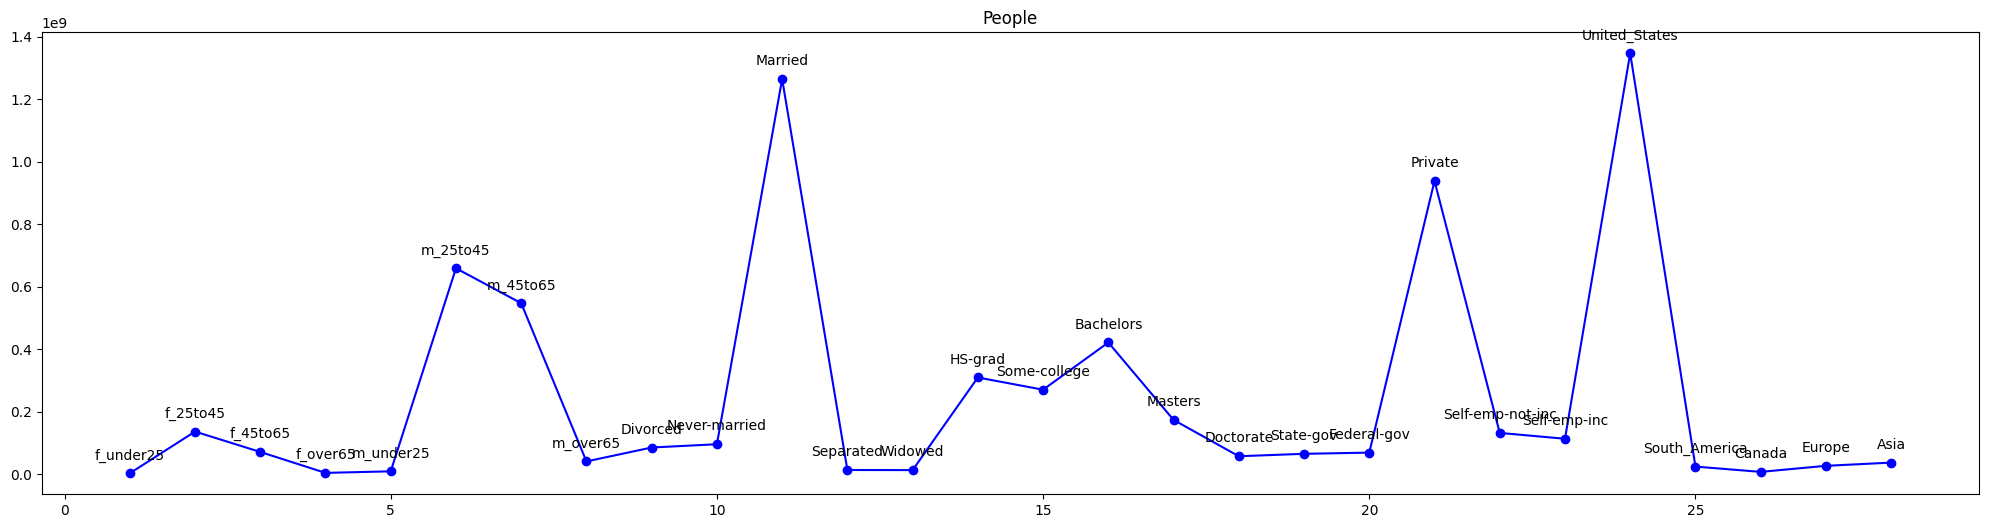

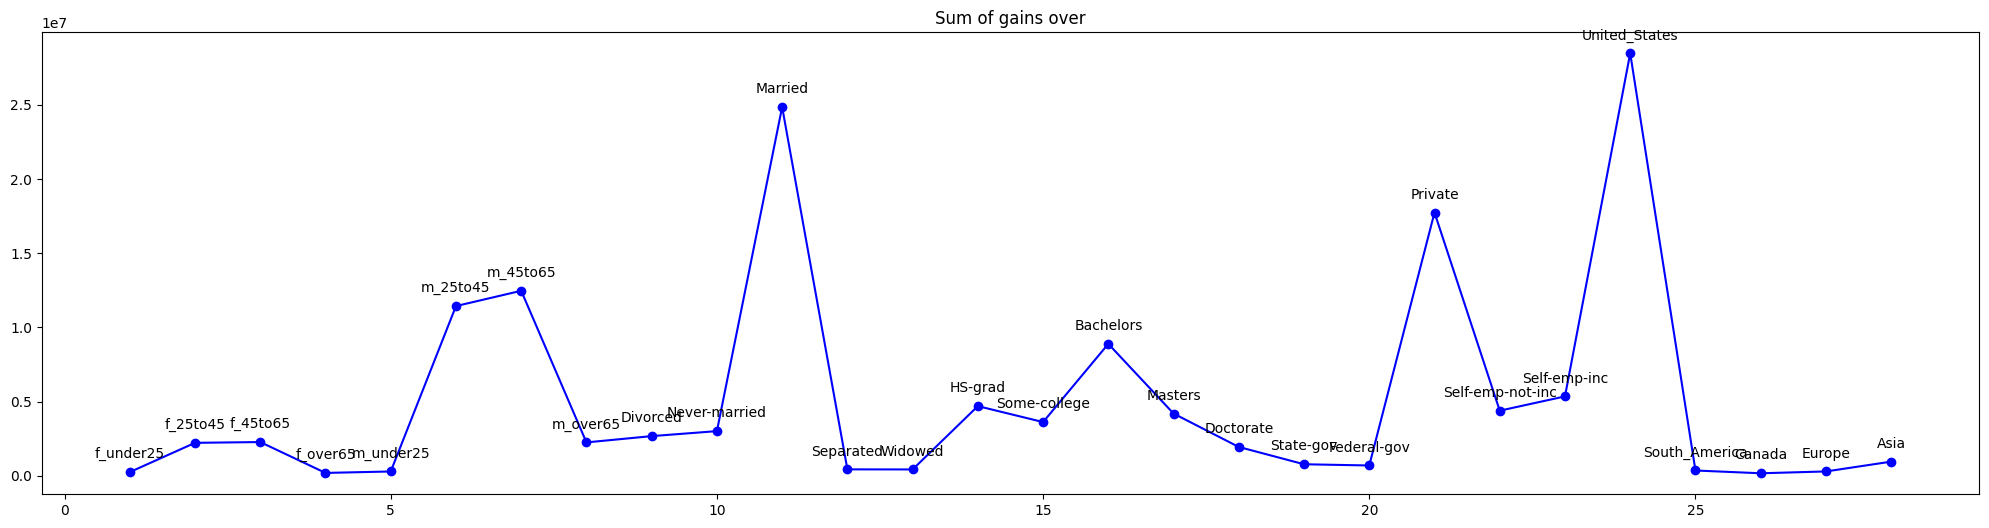

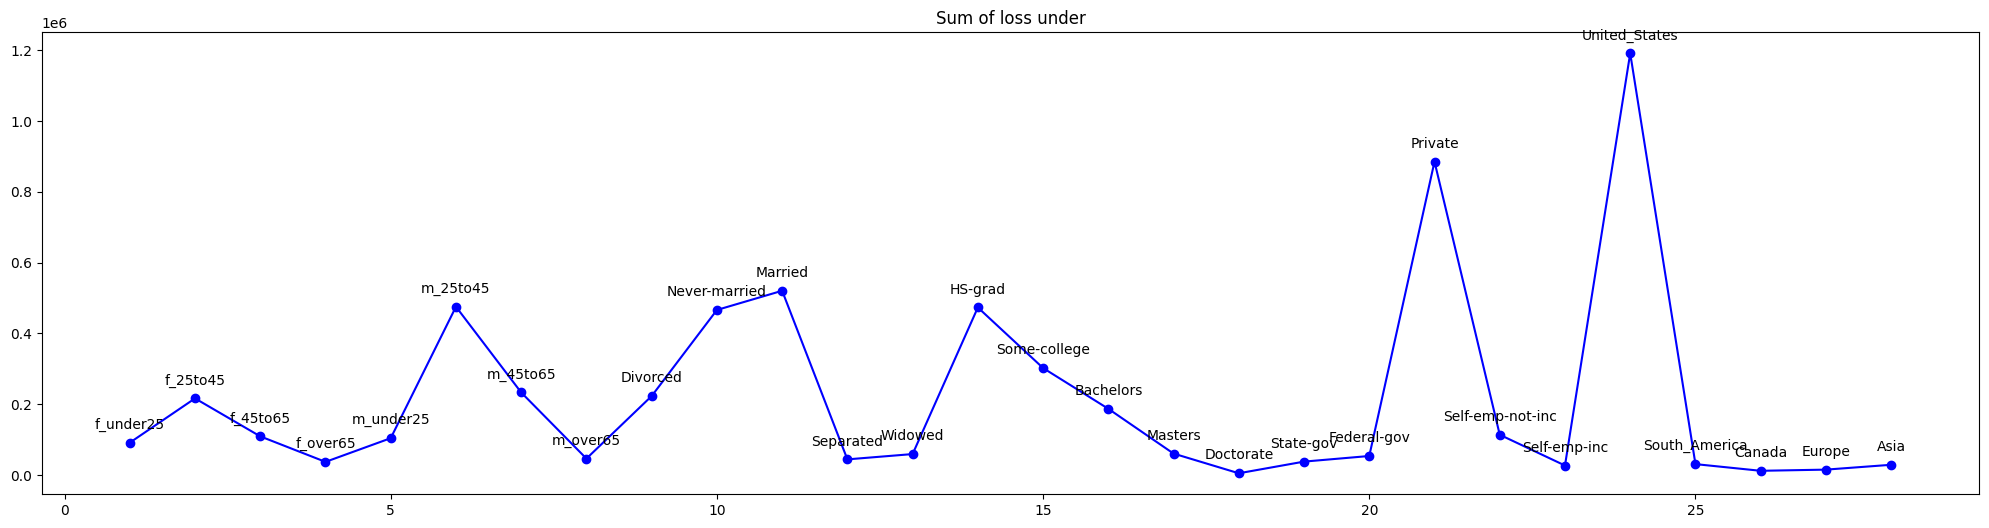

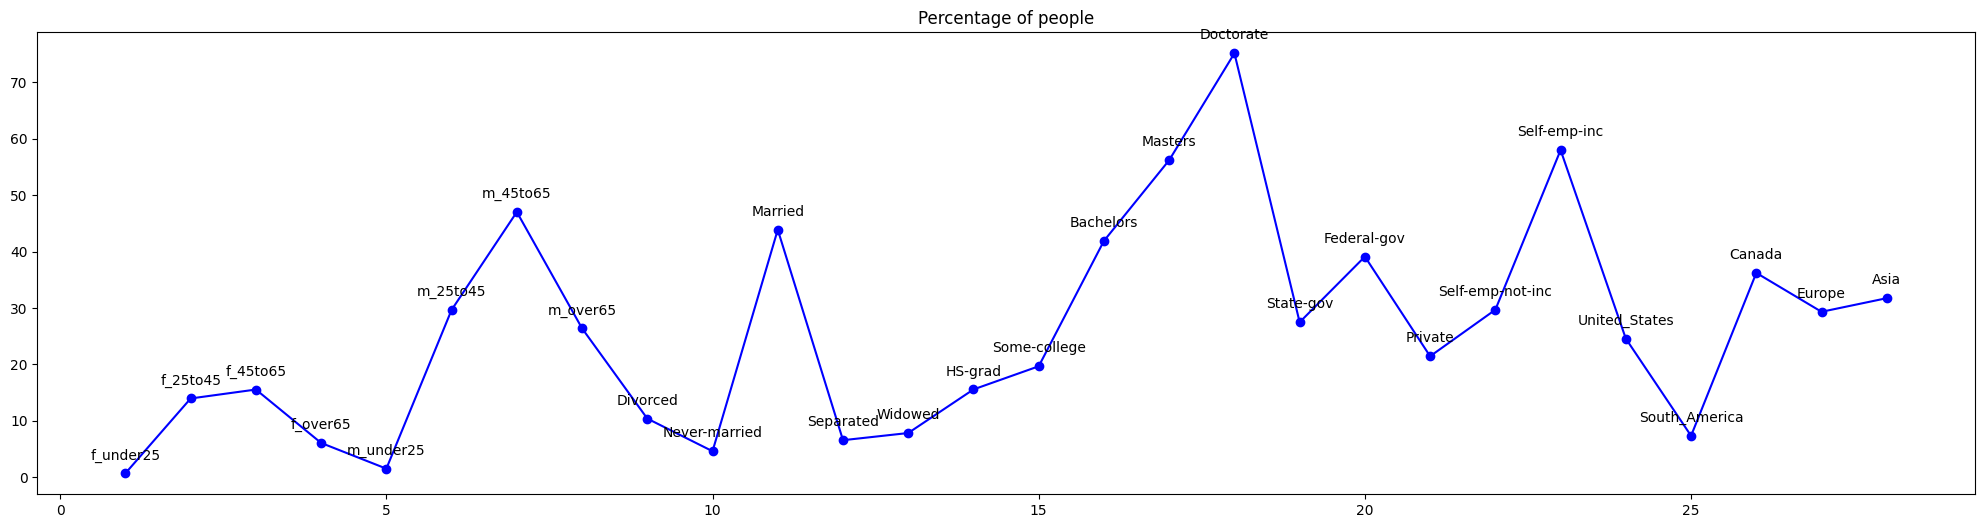

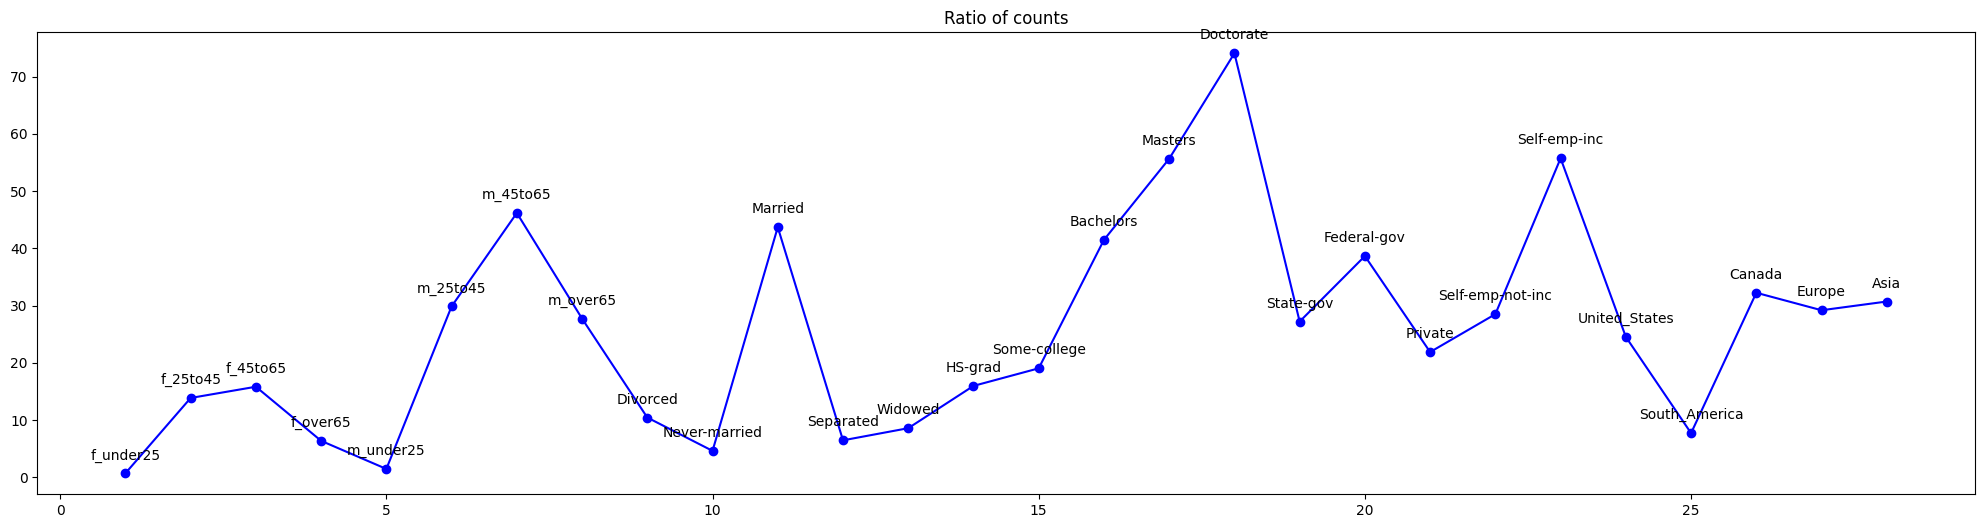

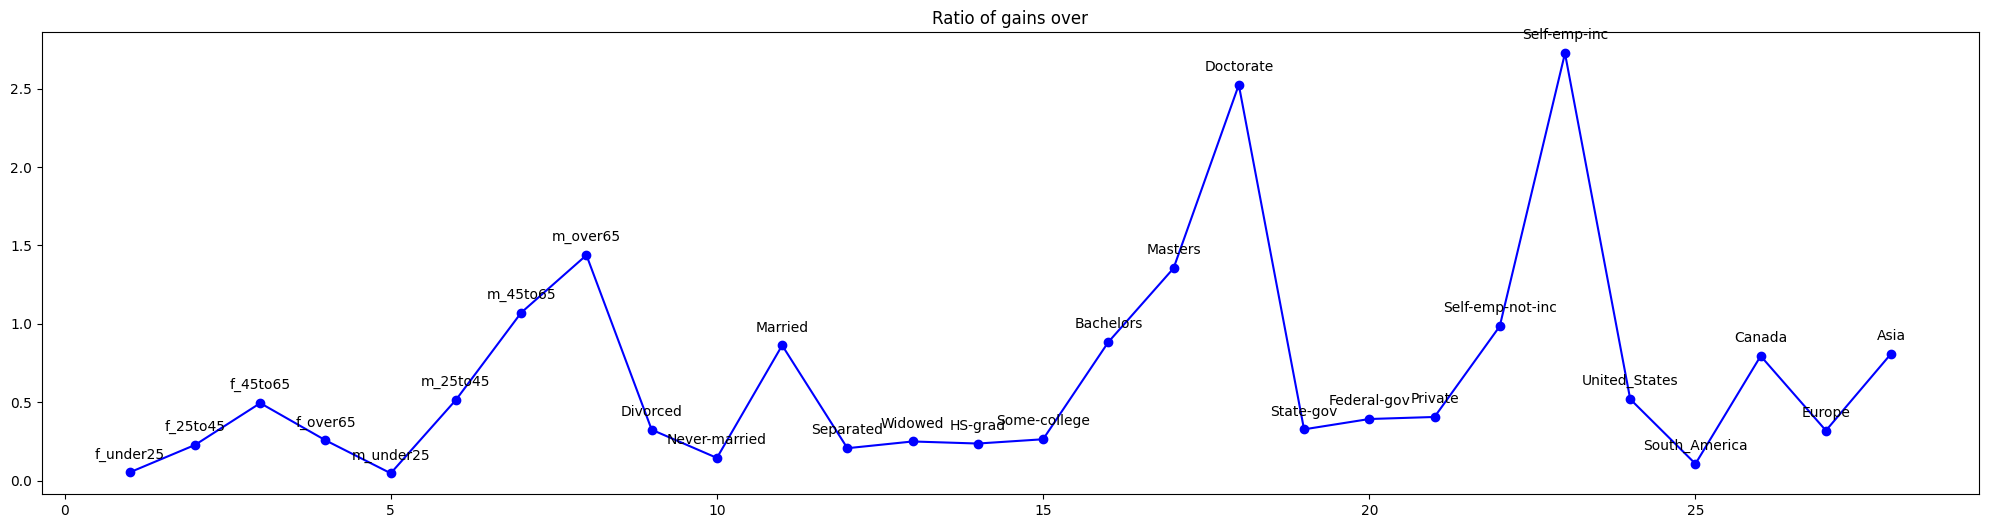

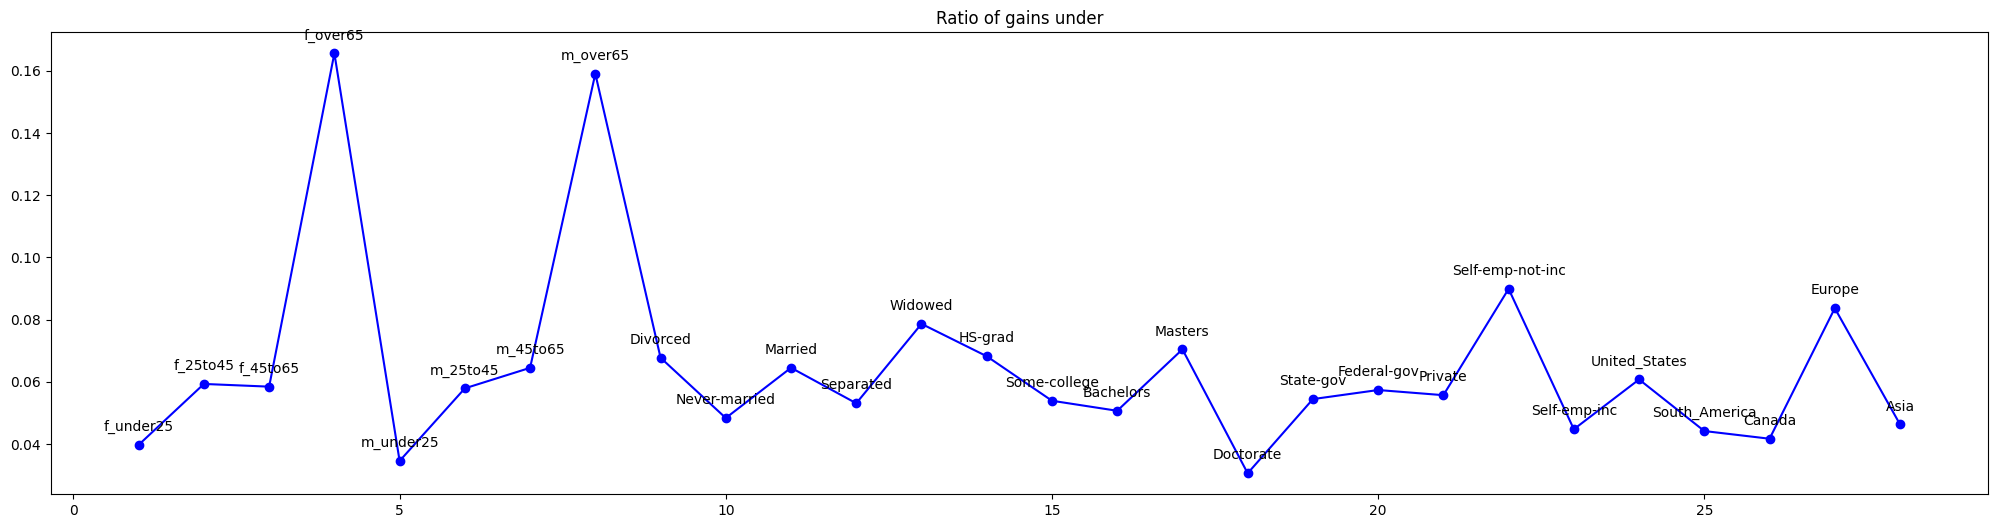

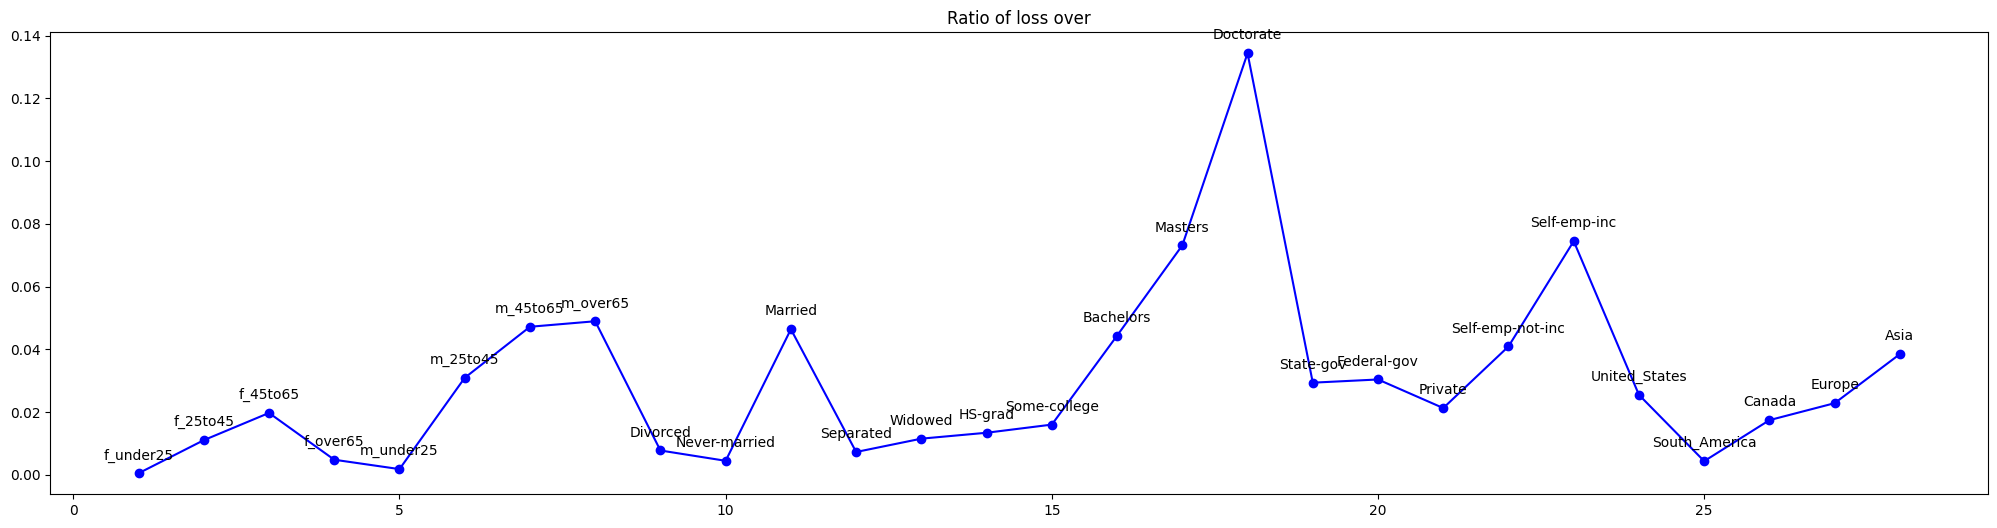

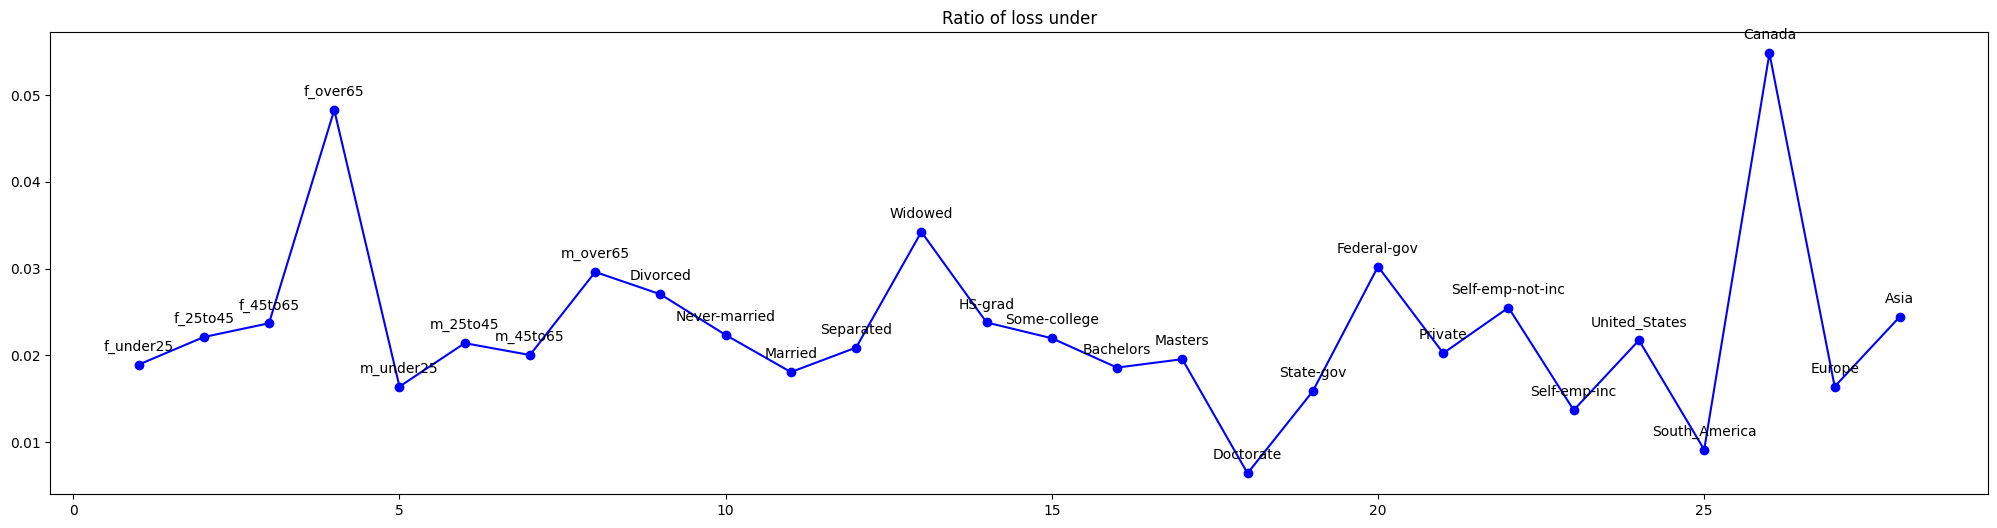

In [ ]:
#Plotting the results from the sums and ratios of all attributes

x_try = np.linspace(1,num, num)
plt.figure(figsize=(25, 6))
# Annotate points and plot with their x-label
plt.plot(x_try, sum_of_people, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, sum_of_people):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('People')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, sum_of_gains_over, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, sum_of_gains_over):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Sum of gains over')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, sum_of_loss_under, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, sum_of_loss_under):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Sum of loss under')
plt.show()



plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_people, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_people):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Percentage of people')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_counts, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_counts):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Ratio of counts')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_gain_over, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_gain_over):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Ratio of gains over')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_gain_under, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_gain_under):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Ratio of gains under')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_loss_over, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_loss_over):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Ratio of loss over')
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(x_try, ratio_loss_under, marker='o', linestyle='-', color='b')
for label, x, y in zip(groups, x_try, ratio_loss_under):
    plt.annotate(f'{label}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Ratio of loss under')
plt.show()

In [ ]:
#Functions for individual graphs of groups

age_index_f_m = [0,4, 4, 8]
marital_stat_index = [8, 13]
education_index = [13, 18]
jobsector_index = [18, 23]
country_index = [23, 28]

#Scatter plot with connecting line and area underneath shaded
def plot_shaded_line(y_values, color, label=0, x_values=0):
  if x_values == 0:
    x_values = np.linspace(1,len(y_values)+1, len(y_values))
  if label !=0:
    plt.plot(x_values, y_values, color=color, label=label)
  else:
    plt.plot(x_values, y_values, color=color)
  plt.scatter(x_values, y_values, color=color)
  # Shade the area underneath the lines
  plt.fill_between(x_values, y_values, alpha=0.3, color=color)
  return


#Plot either 2 lines or two pairs of lines in one graph with 2 axis
def plot_line_2axis_labeled(y1_values, y2_values, colors, labels, label_axis, x_values=0, y3_values=0, y4_values=0):
  # Create a figure and two subplots (2 rows, 1 column)
  fig, ax1 = plt.subplots(figsize=(10, 5))
  if isinstance(x_values, int):
    x_values = np.linspace(1, len(y1_values)+1, len(y1_values))
  if isinstance(y3_values, int):
    color = 'black'
    ax1.set_ylabel(label_axis[0], color=color)
    ax1.plot(x_values, y1_values, color=colors[0], label=labels[0])
    ax1.scatter(x_values, y1_values, color=colors[0])
    ax1.tick_params(axis='y', labelcolor=color)
    # Create a second y-axis
    ax2 = ax1.twinx()
    color = 'black'
    ax2.set_ylabel(label_axis[1], color=color)
    ax2.plot(x_values, y2_values, color=colors[1], label=labels[1])
    ax2.scatter(x_values, y2_values, color=colors[1])
    ax2.tick_params(axis='y', labelcolor=color)
  else:
    color = 'black'
    ax1.set_ylabel(label_axis[0], color=color)
    ax1.plot(x_values, y1_values, color=colors[0], label=labels[0])
    ax1.scatter(x_values, y1_values, color=colors[0])
    ax1.plot(x_values, y2_values, color=colors[1], label=labels[1])
    ax1.scatter(x_values, y2_values, color=colors[1])
    ax1.tick_params(axis='y', labelcolor=color)
    # Create a second y-axis for the first subplot
    ax2 = ax1.twinx()
    color = 'black'
    ax2.set_ylabel(label_axis[1], color=color)
    ax2.plot(x_values, y3_values, color=colors[2], label=labels[2])
    ax2.scatter(x_values, y3_values, color=colors[2])
    ax2.plot(x_values, y4_values, color=colors[3], label=labels[3])
    ax2.scatter(x_values, y4_values, color=colors[3])
    ax2.tick_params(axis='y', labelcolor=color)
  # Adjust layout to prevent clipping of ylabel
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')
  plt.tight_layout()
  return

#Plot either 2 lines or two pairs of lines in one graph with 2 axis; this one is specifically meant for marital status graph
def plot_line_2axis_labeled2(y1_values, y2_values, colors, labels, label_axis, x_values=0, y3_values=0, y4_values=0):
  # Create a figure and two subplots (2 rows, 1 column)
  fig, ax1 = plt.subplots(figsize=(10, 5))
  if isinstance(x_values, int):
    x_values = np.linspace(1, len(y1_values)+1, len(y1_values))
  if isinstance(y3_values, int):
    color = 'black'
    ax1.set_ylabel(label_axis[0], color=color)
    ax1.plot(x_values, y1_values, color=colors[0], label=labels[0])
    ax1.scatter(x_values, y1_values, color=colors[0])
    ax1.tick_params(axis='y', labelcolor=color)
    # Create a second y-axis
    ax2 = ax1.twinx()
    color = 'black'
    ax2.set_ylabel(label_axis[1], color=color)
    ax2.plot(x_values, y2_values, color=colors[1], label=labels[1])
    ax2.scatter(x_values, y2_values, color=colors[1])
    ax2.tick_params(axis='y', labelcolor=color)
  else:
    color = 'black'
    ax1.set_ylabel(label_axis[0], color=color)
    ax1.plot(x_values, y1_values, color=colors[0], label=labels[0])
    ax1.scatter(x_values, y1_values, color=colors[0])
    ax1.tick_params(axis='y', labelcolor=color)
    # Create a second y-axis for the first subplot
    ax2 = ax1.twinx()
    color = 'black'
    ax2.set_ylabel(label_axis[1], color=color)
    ax2.plot(x_values, y2_values, color=colors[1], label=labels[1])
    ax2.scatter(x_values, y2_values, color=colors[1])
    ax2.plot(x_values, y3_values, color=colors[2], label=labels[2])
    ax2.scatter(x_values, y3_values, color=colors[2])
    ax2.plot(x_values, y4_values, color=colors[3], label=labels[3])
    ax2.scatter(x_values, y4_values, color=colors[3])
    ax2.tick_params(axis='y', labelcolor=color)
  # Adjust layout to prevent clipping of ylabel
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right',  bbox_to_anchor=(1, 0.75))
  plt.tight_layout()
  return

# Plot clustered columns
def plot_clustered_columns(categories, labels, colors, values1, values2, values3=0, values4=0):
  bar_width = 0.25
  index = np.arange(len(categories))
  plt.xticks(index + bar_width / 2, categories)
  if isinstance(values3, int) and isinstance(values4, int) :
    plt.bar(index, values1, bar_width, label=labels[0], color=colors[0])
    plt.bar(index + bar_width, values2, bar_width, label=labels[1], color=colors[1])
  else:
    if isinstance(values4, int):
      plt.bar(index, values1, bar_width, label=labels[0], color=colors[0])
      plt.bar(index + bar_width, values2, bar_width, label=labels[1], color=colors[1])
      plt.bar(index + 2*bar_width, values3, bar_width, label=labels[2], color=colors[2])
    else:
      plt.bar(index, values1, bar_width, label=labels[0], color=colors[0])
      plt.bar(index + bar_width, values2, bar_width, label=labels[1], color=colors[1])
      plt.bar(index + 2*bar_width, values3, bar_width, label=labels[2], color=colors[2])
      plt.bar(index + 3*bar_width, values4, bar_width, label=labels[3], color=colors[3])
  return


#Plotting stacked and clustered columns
def plot_clustered_stacked_columns(categories, labels, colors, values1, values1_2, values2=0, values2_2=0):
  bar_width = 0.25
  index = np.arange(len(categories))
  plt.xticks(index + bar_width / 2, categories)
  if isinstance(values2, int) and isinstance(values2_2, int) :
    plt.bar(index, values1, bar_width, label=labels[0], color=colors[0])
    plt.bar(index, values1_2, bar_width, label=labels[1], color=colors[1])
  else:
    plt.bar(index, values1, bar_width, label=labels[0], color=colors[0])
    plt.bar(index, values1_2, bar_width, bottom=values1, label=labels[1], color=colors[1])
    plt.bar(index + bar_width, values2, bar_width, label=labels[2], color=colors[2])
    plt.bar(index + bar_width, values2_2, bar_width, bottom=values2, label=labels[3], color=colors[3])
  return


# Plot clustered and stacked columns with 2 different axis
def plot_clustered_stacked_2axis(categories, labels, labels_axis, colors, values1, values2, values3=0, values4=0):
  bar_width = 0.25
  fig, ax1 = plt.subplots()
  ax1.set_ylabel(labels_axis[0])
  index = np.arange(len(categories))
  plt.xticks(index + bar_width / 2, categories)
  if isinstance(values3, int) and isinstance(values4, int) :
    ax2 = ax1.twinx()
    ax2.set_ylabel(labels_axis[1])
    ax1.bar(index, values1, bar_width, label=labels[0], color=colors[0])
    ax1.legend()
    ax2.bar(index + bar_width, values2, bar_width, label=labels[1], color=colors[1])
    ax2.legend()
  else:
    ax2 = ax1.twinx()
    ax2.set_ylabel(labels_axis[1])
    ax1.bar(index, values1, bar_width, label=labels[0], color=colors[0])
    ax1.bar(index, values2, bar_width, bottom=values1, label=labels[1], color=colors[1])
    ax1.legend()
    ax2.bar(index + bar_width, values3, bar_width, label=labels[2], color=colors[2])
    ax2.bar(index + bar_width, values4, bar_width, bottom=values3, label=labels[3], color=colors[3])
    ax2.legend(loc='lower right')
  return fig





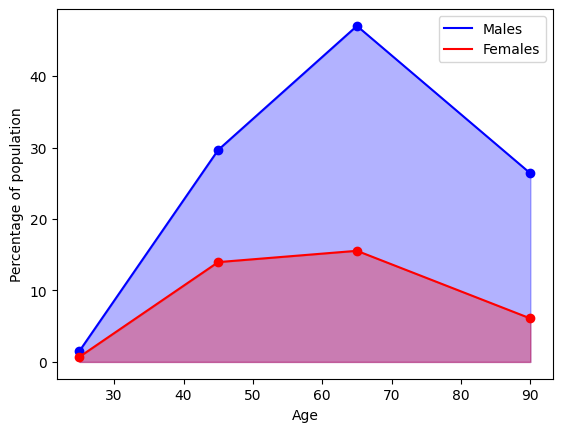

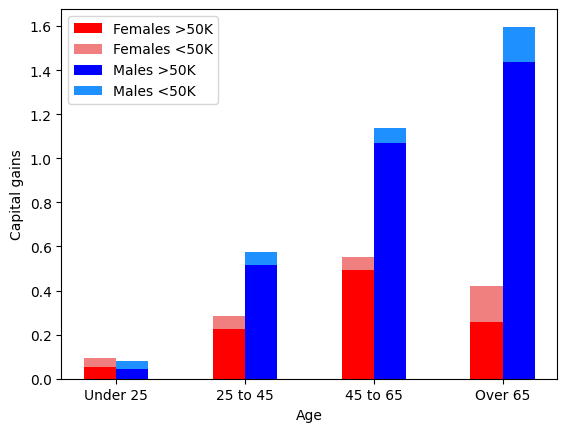

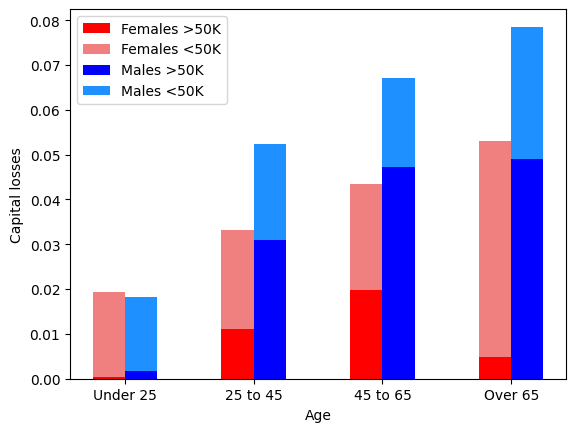

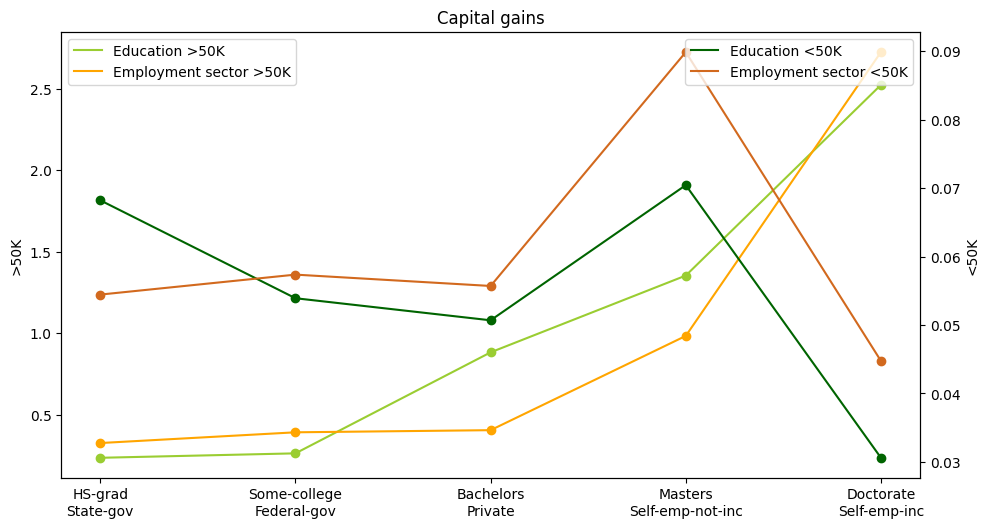

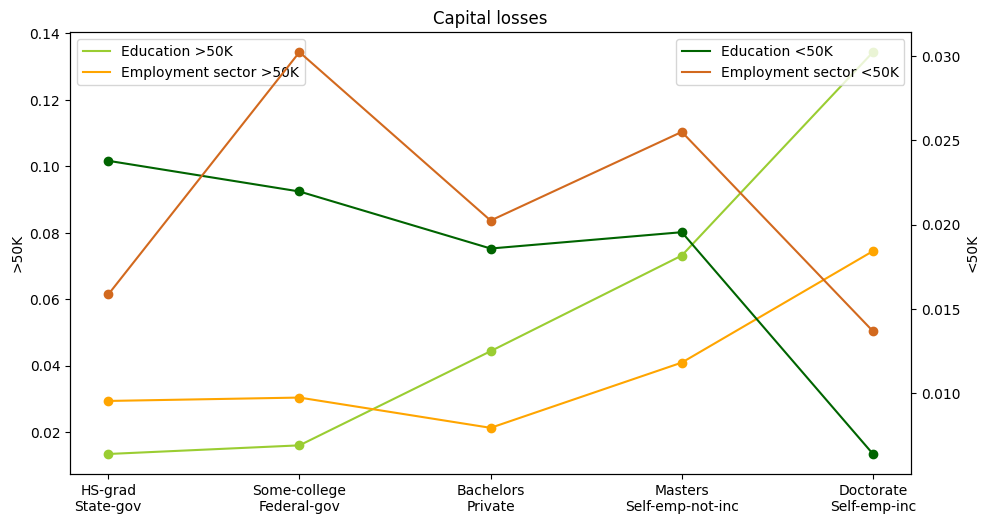

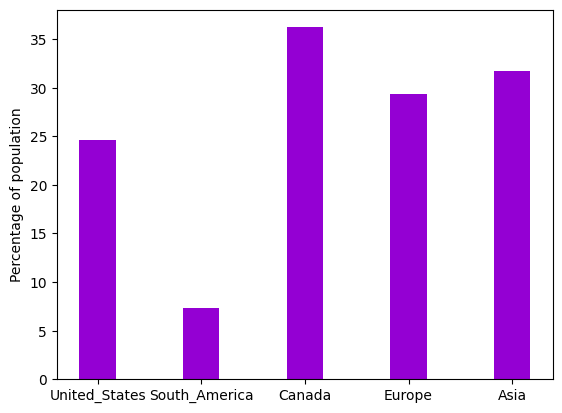

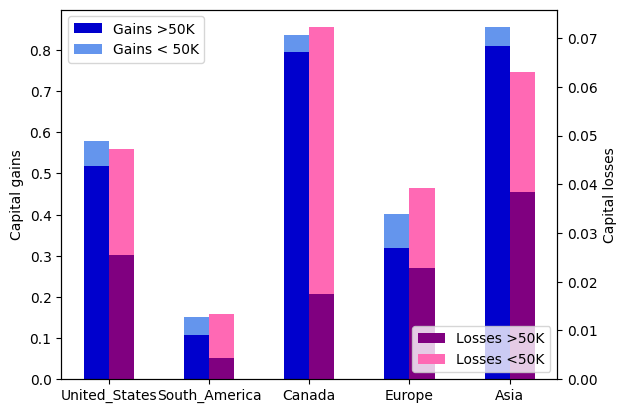

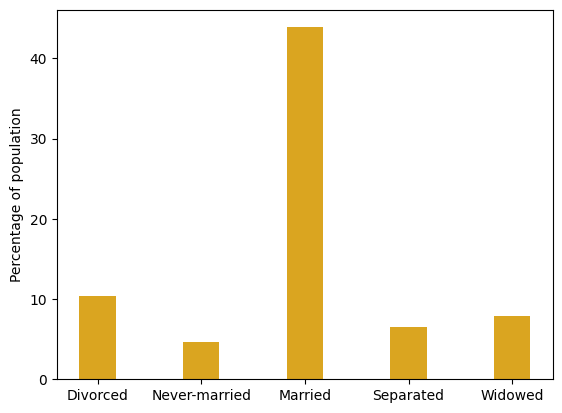

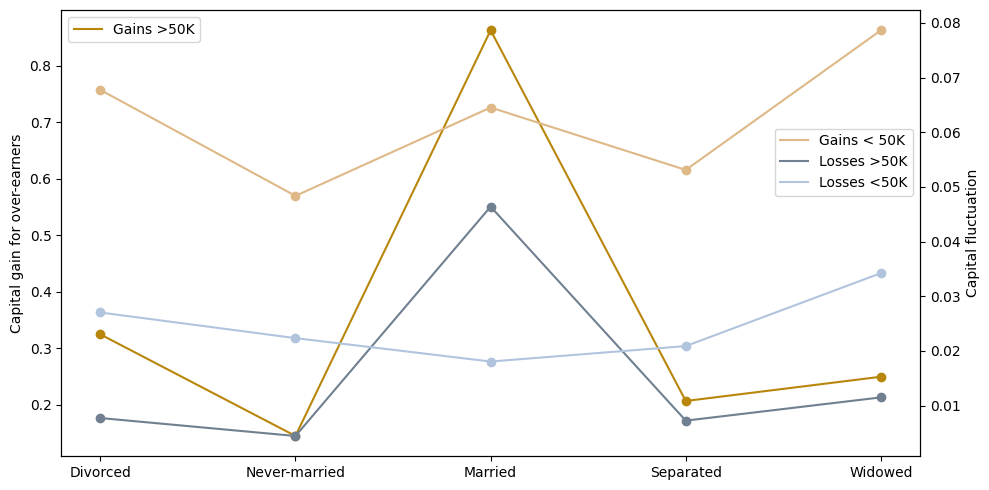

In [ ]:
#Plotting

#AGE AND GENDER -----------------------------------------------------------------
#Percentage of population earning over 50K
y1_values = ratio_people[age_index_f_m[0]: age_index_f_m[1]]
y2_values = ratio_people[age_index_f_m[2]: age_index_f_m[3]]
x1_age = [25,45,65,90]
plot_shaded_line(y2_values, 'blue', 'Males', x1_age)
plot_shaded_line(y1_values, 'Red', 'Females', x1_age)
plt.ylabel('Percentage of population')
plt.xlabel('Age')
plt.legend()
plt.show()

#Gains and losses for populations over and under 50K
y1_values, y2_values = ratio_gain_over[age_index_f_m[0]:age_index_f_m[1]], ratio_gain_over[age_index_f_m[2]:age_index_f_m[3]]
y3_values, y4_values = ratio_gain_under[age_index_f_m[0]:age_index_f_m[1]], ratio_gain_under[age_index_f_m[2]:age_index_f_m[3]]
categories_age = ['Under 25', '25 to 45', '45 to 65', 'Over 65']
labels_age = ['Females >50K', 'Females <50K', 'Males >50K', 'Males <50K']
colors_age = ['red', 'lightcoral', 'blue', 'dodgerblue']
plot_clustered_stacked_columns(categories_age, labels_age, colors_age, y1_values, y3_values, y2_values, y4_values)
plt.xlabel('Age')
plt.ylabel('Capital gains')
plt.legend()
plt.show()

y1_values, y2_values = ratio_loss_over[age_index_f_m[0]:age_index_f_m[1]], ratio_loss_over[age_index_f_m[2]:age_index_f_m[3]]
y3_values, y4_values = ratio_loss_under[age_index_f_m[0]:age_index_f_m[1]], ratio_loss_under[age_index_f_m[2]:age_index_f_m[3]]
categories_age = ['Under 25', '25 to 45', '45 to 65', 'Over 65']
labels_age = ['Females >50K', 'Females <50K', 'Males >50K', 'Males <50K']
colors_age = ['red', 'lightcoral', 'blue', 'dodgerblue']
plot_clustered_stacked_columns(categories_age, labels_age, colors_age, y1_values, y3_values, y2_values, y4_values)
plt.ylabel('Capital losses')
plt.xlabel('Age')
plt.legend()
plt.show()


#JOB SECTOR AND EDUCATION LEVEL --------------------------------------------------
#Gains and losses for over and under 50K
y1_values, y2_values = ratio_gain_over[education_index[0]:education_index[1]], ratio_gain_over[jobsector_index[0]:jobsector_index[1]]
y3_values, y4_values = ratio_gain_under[education_index[0]:education_index[1]], ratio_gain_under[jobsector_index[0]:jobsector_index[1]]
x_educ_sec = np.linspace(1, len(y1_values)+1, len(y1_values))
label1_x, label2_x = groups[education_index[0]:education_index[1]].copy(), groups[jobsector_index[0]:jobsector_index[1]].copy()
labels_education_sector = ['Education >50K', 'Employment sector >50K', 'Education <50K', 'Employment sector <50K']
label_axis_education_sector = ['>50K', '<50K']
colors_education_sector = ['yellowgreen', 'orange', 'darkgreen', 'chocolate']
plot_line_2axis_labeled(y1_values, y2_values, colors_education_sector, labels_education_sector, label_axis_education_sector, x_educ_sec, y3_values, y4_values)
custom_labels = []
for i in range(len(label1_x)):
  string = label1_x[i] +'\n' + label2_x[i]
  custom_labels.append(string)
# Set custom ticks and labels for the x-axis
plt.xticks(x_educ_sec, custom_labels)
plt.title('Capital gains')
plt.show()

y1_values, y2_values = ratio_loss_over[education_index[0]:education_index[1]], ratio_loss_over[jobsector_index[0]:jobsector_index[1]]
y3_values, y4_values = ratio_loss_under[education_index[0]:education_index[1]], ratio_loss_under[jobsector_index[0]:jobsector_index[1]]
label1_x, label2_x = groups[education_index[0]:education_index[1]].copy(), groups[jobsector_index[0]:jobsector_index[1]].copy()
labels_education_sector = ['Education >50K', 'Employment sector >50K', 'Education <50K', 'Employment sector <50K']
label_axis_education_sector = ['>50K', '<50K']
colors_education_sector = ['yellowgreen', 'orange', 'darkgreen', 'chocolate']
plot_line_2axis_labeled(y1_values, y2_values, colors_education_sector, labels_education_sector, label_axis_education_sector, x_educ_sec, y3_values, y4_values)
custom_labels = []
for i in range(len(label1_x)):
  string = label1_x[i] +'\n' + label2_x[i]
  custom_labels.append(string)
# Set custom ticks and labels for the x-axis
plt.xticks(x_educ_sec, custom_labels)
plt.title('Capital losses')
plt.show()



#COUNTRY OF ORIGIN ----------------------------------------------------------------
#Percentage of people with income over 50k
y1_values = ratio_people[country_index[0]:country_index[1]]
categories_country = ['United_States', 'South_America', 'Canada', 'Europe', 'Asia']
bar_width = 0.35
index = np.arange(len(categories_country))
plt.xticks(index, categories_country)
plt.ylabel('Percentage of population')
plt.bar(index, y1_values, bar_width, color='darkviolet')
plt.show()

#Gains and losses for over and under 50K
y1_values, y2_values = ratio_gain_over[country_index[0]:country_index[1]], ratio_gain_under[country_index[0]:country_index[1]]
y3_values, y4_values = ratio_loss_over[country_index[0]:country_index[1]], ratio_loss_under[country_index[0]:country_index[1]]
x_country = np.linspace(1, len(y1_values)+1, len(y1_values))
labels_country = ['Gains >50K', 'Gains < 50K', 'Losses >50K', 'Losses <50K']
label_axis_country = ['Capital gains', 'Capital losses']
colors_country = ['mediumblue', 'cornflowerblue', 'purple', 'hotpink']
label_x = groups[country_index[0]:country_index[1]].copy()
fig = plot_clustered_stacked_2axis(label_x, labels_country, label_axis_country, colors_country, y1_values, y2_values, y3_values, y4_values)
plt.show()

#MARITAL STATUS -------------------------------------------------------------------
#Percentage of people with income over 50k
y1_values = ratio_people[marital_stat_index[0]:marital_stat_index[1]]
categories_marital = groups[marital_stat_index[0]:marital_stat_index[1]]
bar_width = 0.35
index = np.arange(len(categories_marital))
plt.xticks(index, categories_marital)
plt.ylabel('Percentage of population')
plt.bar(index, y1_values, bar_width, color='goldenrod')
plt.show()

#Gains and losses for over and under 50K
y1_values, y2_values = ratio_gain_over[marital_stat_index[0]:marital_stat_index[1]], ratio_gain_under[marital_stat_index[0]:marital_stat_index[1]]
y3_values, y4_values = ratio_loss_over[marital_stat_index[0]:marital_stat_index[1]], ratio_loss_under[marital_stat_index[0]:marital_stat_index[1]]
x_marital = np.linspace(1, len(y1_values)+1, len(y1_values))
labels_marital = ['Gains >50K', 'Gains < 50K', 'Losses >50K', 'Losses <50K']
label_axis_marital = ['Capital gain for over-earners', 'Capital fluctuation']
colors_marital = ['darkgoldenrod', 'burlywood', 'slategrey', 'lightsteelblue']
plot_line_2axis_labeled2(y1_values, y2_values, colors_marital, labels_marital, label_axis_marital, x_marital, y3_values, y4_values)
# Set custom ticks and labels for the x-axis
label_x = groups[marital_stat_index[0]:marital_stat_index[1]].copy()
plt.xticks(x_educ_sec, label_x)
plt.show()